<h1 align="center" style=font-size:50px>Bank Customer Churn Prediction</h1>
<h3 align="center" style=font-size:30px>Análise Exploratória</h3>
<h6 align="center" style=font-size:20px>Essa análise exploratória, destina-se, a ajudar a entender melhor o conjunto de dados para posteriormente fazer a modelagem.</h6>


### Sobre o DataSet
Este conjunto de dados contém informações sobre os clientes de um banco e o status de churn desses clientes.

### Estrutura do DataSet
-`RowNumber`: Indica o número da linha do dataset.  
-`CustomerId`: Identificador exclusivo para cada cliente.  
-`Surname`: Sobrenome do cliente.  
-`CreditScore`: Pontuação de crédito do cliente.  
-`Geography`:  A localização geográfica do cliente (por exemplo, país ou região).  
-`Gender`: O gênero do cliente.  
-`Age`: A idade do cliente.  
-`Tenure`:  O número de anos que o cliente está no banco.  
-`Balance`: O saldo da conta do cliente.  
-`NumOfProducts`: A quantidade de produtos bancários que o cliente possui.  
-`HasCrCard`:  Indica se o cliente possui cartão de crédito (binary: yes/no).  
-`IsActiveMember`:  Indica se o cliente é um membro ativo (binary: yes/no).  
-`EstimatedSalary`: O salário estimado do cliente.    
-`Exited`: Indica se o cliente saiu do banco (binary: yes/no).  

In [50]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import altair as alt
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

In [35]:
# carregando po dataset
df = pd.read_csv('../data/Churn_Modelling.csv')

In [36]:
# Verificando as 5 primeiras linhas
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
# Verificando a quantidade de linhas e colunas do dataset
df.shape

(10000, 14)

O dataset possui 10000 linhas e 14 colunas.

In [38]:
# Verificando as colunas do datset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Vamos retirar a coluna RowNumber e CustomerId, pois não vamos precisar delas.

In [39]:
# Retirando as colunas RowNumber e CustomerId
df_cleaned = df.drop(['RowNumber','CustomerId'],axis=1).copy()

In [40]:
df_cleaned.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
# Verificando algumas informações do dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [42]:
# Verificando se tem valores nulos
df_cleaned.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
# Verificando se há valores duplicados
print(f'Há {df_cleaned.duplicated().sum()} valores duplicados.')

Há 0 valores duplicados.


In [44]:
# Verificando algumas estatisticas do datset
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


Algumas observações:
- A média de idade é de quase 39 anos.
- A média de permanência no banco é de 5 anos.
- A média de salário estimado dos clientes é de aproximadamente 100 mil.

## Análise Univariada

In [45]:
# Separando as variáveis numérias e categóricas
numerical_variables = df_cleaned[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].copy()
categorical_variables = df_cleaned.drop(numerical_variables.columns,axis=1).copy()
categorical_variables = df_cleaned.drop('Exited',axis=1).copy()

### Analisando as variáveis categóricas

#### 1. Surname

In [64]:
surnames = categorical_variables['Surname']
surnames_string = ' '.join(surnames.values)

In [65]:
# criando uma nuvem de palavras com os surnames dos clientes
wordcloud = WordCloud(colormap='viridis',background_color='white',random_state=24).generate(surnames_string)

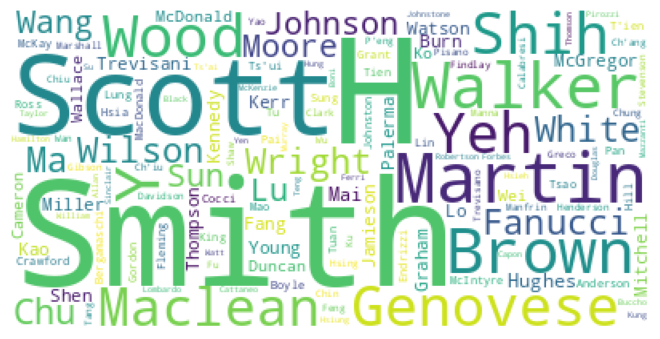

In [66]:
# plotando a nuvem de palavras
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [71]:
surnames.value_counts().sort_values(ascending=False).to_frame()[-5:]

# pensar se vou fazer a nuvem de palavras ou nao

,count
Surname,
Bancroft,1
Reagan,1
McNaughtan,1
Mullen,1
Burbidge,1
